In [1]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 

In [2]:
Lambda = np.array([
[0, 2/5, 1/5, 0, 0],
[0, 0, 3/4, 1/4, 0],
[1/2, 0, 0, 1/2, 0],
[0, 0, 1/3, 0, 2/3],
[0, 1/3, 0, 1/3, 0],
])

In [3]:
omega = Lambda@np.ones(Lambda.shape[0])
D = np.diag(omega)
P = np.linalg.inv(D)@Lambda
P

array([[0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.75      , 0.25      , 0.        ],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.66666667],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ]])

In [4]:
omega_star = np.max(omega)
Q = Lambda/omega_star 
Q = Q + np.diag(np.ones(len(omega))-np.sum(Q,axis=1))

values,vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)

pi_bar = vectors[:,index].real
pi_bar = pi_bar/np.sum(pi_bar)
print('Q: ', Q)
print("pi_bar=", pi_bar)

Q:  [[0.4        0.4        0.2        0.         0.        ]
 [0.         0.         0.75       0.25       0.        ]
 [0.5        0.         0.         0.5        0.        ]
 [0.         0.         0.33333333 0.         0.66666667]
 [0.         0.33333333 0.         0.33333333 0.33333333]]
pi_bar= [0.18518519 0.14814815 0.22222222 0.22222222 0.22222222]


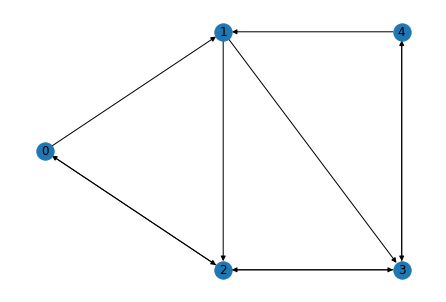

In [5]:
G = nx.DiGraph()

G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(1,2), (1, 3),  (0, 1), (4, 1), (3, 4), (4, 3), (0, 2), (2, 0), (2, 3), (3, 2)])


positions = {1: (1,1), 2: (1,-1), 3: (2,-1), 4: (2,1), 0: (0,0)}

nx.draw(G, positions, with_labels=True)

# a) particle perspective

In [41]:
n_particles = 100
n_simulations = 1000
return_times_particles = []

for p in range(n_particles): # simulate over 100 particles
    return_times = []

    for s in range(n_simulations): # simulate a walk  for each particle
        # Compute the cumulative sums of the rows of P
        P_cum = np.cumsum(P, axis=1)
        transition_time = 0
        pos = 1 # starting position (a)
        while True:
            # the next state to visit will be extracted according to the probabilities
            # stored in the row of P corresponding to the current state.
            pos = np.argwhere(P_cum[pos] > np.random.rand())[0][0]
            t_next = -np.log(np.random.rand())/omega[pos]
            # store the time instant of the current transition
            transition_time += t_next

            if pos == 1:
                break


        return_times.append(transition_time)
    print(np.mean(return_times))
    return_times_particles.append(np.mean(return_times))

6.649351744143377
6.657959632241727
7.030105454074617
6.678939600868803
7.027734933545481
6.54944996678534
6.546310162636054
6.845275063635529
6.928455603150288
6.747207251735749
6.830114533258209
6.535982429723513
6.73632406056248
7.092620438718548
6.786386705290931
6.979361101905641
6.929360050085169
6.839205256776775
6.5352078845011725
6.88267533821422
6.926299138591739
6.645842202803849
6.713987320566139
7.294167180759984
6.613371242214923
7.002837026999874
6.525705647427798
6.829236776062668
6.704265180497767
6.874000441523034
6.802922170083742
6.671449130753481
6.907386937421932
6.63556192682104
6.62407805695242
6.860703462315472
6.912241081281447
6.759272489767645
6.663580266693566
6.673460094597089
6.7738615559943245
6.693263981756807
6.865954048696441
6.8251666324897124
6.998241391937267
6.683682108594472
6.826699246991882
6.612590495445438
6.855877863680671
6.675384025599684
6.549753401511934
6.838380958857606
6.931355498867555
6.991722065673424
6.76980151392412
7.04677175386

In [42]:
np.mean(return_times_particles)

6.770516046206576

# b) node perspective

In [44]:
time_limit = 60
rate = 100
states = []
times = []
eps = 1e-16

node_states = np.array([100, 0, 0, 0, 0]) #node o has 100 particles
total_time = 0
node_probs = node_states/np.sum(node_states)
    
while total_time<time_limit:
    t_nexts = -np.log(np.random.rand(G.number_of_nodes()))/((node_states+eps)*omega)

    total_time += min(t_nexts) 

    sel_node = np.argmin(t_nexts) # select node based on the earliest clock tick

    des_node = np.random.choice(G.nodes(), p = P[sel_node, :]) # select destination based on probability to go from current node

    # change the states
    node_states[sel_node] -=1
    node_states[des_node] +=1
    
    node_probs = node_states/np.sum(node_states)
    
    times.append(total_time)
    states.append(node_states.tolist())

    print(node_states)
print(np.mean(states, axis=0))

[99  0  1  0  0]
[98  1  1  0  0]
[97  1  2  0  0]
[96  1  3  0  0]
[95  1  4  0  0]
[94  2  4  0  0]
[93  3  4  0  0]
[92  4  4  0  0]
[93  4  3  0  0]
[92  4  4  0  0]
[91  5  4  0  0]
[90  6  4  0  0]
[89  7  4  0  0]
[88  8  4  0  0]
[87  9  4  0  0]
[86 10  4  0  0]
[85 11  4  0  0]
[84 12  4  0  0]
[83 13  4  0  0]
[82 14  4  0  0]
[81 14  5  0  0]
[80 15  5  0  0]
[80 14  6  0  0]
[79 14  7  0  0]
[78 14  8  0  0]
[78 14  7  1  0]
[78 13  8  1  0]
[77 14  8  1  0]
[76 15  8  1  0]
[75 16  8  1  0]
[75 15  9  1  0]
[74 15 10  1  0]
[73 15 11  1  0]
[73 15 10  2  0]
[72 15 11  2  0]
[71 16 11  2  0]
[71 15 12  2  0]
[70 15 13  2  0]
[69 16 13  2  0]
[68 17 13  2  0]
[68 16 14  2  0]
[67 17 14  2  0]
[66 17 15  2  0]
[65 18 15  2  0]
[65 18 16  1  0]
[64 18 17  1  0]
[63 18 18  1  0]
[64 18 17  1  0]
[63 19 17  1  0]
[63 19 16  2  0]
[62 20 16  2  0]
[62 20 15  3  0]
[61 21 15  3  0]
[60 21 16  3  0]
[60 20 16  4  0]
[60 19 17  4  0]
[61 19 16  4  0]
[60 19 17  4  0]
[61 19 16  4  

[21 14 24 18 23]
[22 14 23 18 23]
[21 15 23 18 23]
[22 15 22 18 23]
[22 16 22 18 22]
[23 16 21 18 22]
[23 16 22 17 22]
[23 15 23 17 22]
[23 14 24 17 22]
[23 14 23 18 22]
[23 14 23 19 21]
[23 14 23 18 22]
[24 14 22 18 22]
[24 14 22 17 23]
[24 14 22 16 24]
[24 14 23 15 24]
[23 14 24 15 24]
[23 14 23 16 24]
[23 14 22 17 24]
[23 13 23 17 24]
[22 14 23 17 24]
[22 13 24 17 24]
[22 13 25 16 24]
[21 14 25 16 24]
[21 13 26 16 24]
[21 12 26 17 24]
[21 13 26 17 23]
[20 13 27 17 23]
[20 13 28 16 23]
[19 14 28 16 23]
[18 15 28 16 23]
[18 15 27 17 23]
[18 15 27 18 22]
[18 15 27 17 23]
[18 15 26 18 23]
[18 15 27 17 23]
[18 15 27 16 24]
[18 15 26 17 24]
[19 15 25 17 24]
[19 14 26 17 24]
[19 14 25 18 24]
[20 14 24 18 24]
[20 14 23 19 24]
[20 14 24 18 24]
[21 14 23 18 24]
[21 15 23 18 23]
[21 15 23 17 24]
[21 16 23 17 23]
[21 16 24 16 23]
[20 17 24 16 23]
[20 17 24 15 24]
[20 18 24 15 23]
[20 17 25 15 23]
[20 17 24 16 23]
[20 16 25 16 23]
[21 16 24 16 23]
[21 16 24 15 24]
[21 16 24 16 23]
[21 16 24 17 2

[17 14 25 24 20]
[17 15 25 24 19]
[17 14 26 24 19]
[17 14 27 23 19]
[17 14 27 22 20]
[16 15 27 22 20]
[16 14 28 22 20]
[16 13 28 23 20]
[16 13 27 24 20]
[16 13 27 23 21]
[16 13 26 24 21]
[16 13 26 23 22]
[16 13 25 24 22]
[16 13 24 25 22]
[16 13 25 24 22]
[16 12 26 24 22]
[17 12 25 24 22]
[17 12 25 25 21]
[17 13 25 25 20]
[16 14 25 25 20]
[16 14 26 24 20]
[15 14 27 24 20]
[16 14 26 24 20]
[16 14 26 23 21]
[15 15 26 23 21]
[15 16 26 23 20]
[14 17 26 23 20]
[14 17 26 22 21]
[14 17 26 21 22]
[14 16 27 21 22]
[14 17 27 21 21]
[14 17 27 20 22]
[13 18 27 20 22]
[13 17 28 20 22]
[13 18 28 20 21]
[14 18 27 20 21]
[14 18 27 19 22]
[15 18 26 19 22]
[15 18 26 18 23]
[14 18 27 18 23]
[14 18 27 17 24]
[14 17 28 17 24]
[14 17 28 16 25]
[14 17 28 15 26]
[14 16 29 15 26]
[14 15 30 15 26]
[14 15 31 14 26]
[15 15 30 14 26]
[15 15 31 13 26]
[15 16 31 13 25]
[15 15 32 13 25]
[15 15 31 14 25]
[15 16 31 14 24]
[15 16 30 15 24]
[15 16 29 16 24]
[15 16 29 15 25]
[15 16 29 16 24]
[15 15 30 16 24]
[15 15 30 15 2

[17 15 25 16 27]
[16 15 26 16 27]
[16 15 26 17 26]
[16 15 26 18 25]
[16 14 26 19 25]
[16 13 27 19 25]
[16 12 28 19 25]
[16 12 28 18 26]
[16 13 28 18 25]
[15 13 29 18 25]
[16 13 28 18 25]
[16 13 27 19 25]
[16 14 27 19 24]
[16 13 27 20 24]
[15 13 28 20 24]
[15 14 28 20 23]
[15 14 27 21 23]
[14 14 28 21 23]
[14 15 28 21 22]
[14 14 29 21 22]
[14 13 30 21 22]
[14 13 30 20 23]
[14 12 30 21 23]
[14 12 30 20 24]
[14 11 30 21 24]
[14 11 30 22 23]
[14 11 30 21 24]
[14 11 30 22 23]
[14 11 29 23 23]
[14 11 28 24 23]
[14 11 29 23 23]
[15 11 28 23 23]
[15 11 28 24 22]
[15 10 28 25 22]
[15 10 27 26 22]
[15 10 27 25 23]
[15 11 27 25 22]
[15 11 27 24 23]
[15 11 28 23 23]
[15 11 28 22 24]
[15 10 29 22 24]
[16 10 28 22 24]
[16 10 28 21 25]
[16 10 27 22 25]
[15 10 28 22 25]
[15 10 28 21 26]
[15  9 29 21 26]
[15  9 29 22 25]
[15  9 28 23 25]
[15  8 29 23 25]
[14  8 30 23 25]
[14  8 30 22 26]
[15  8 29 22 26]
[15  8 30 21 26]
[15  8 29 22 26]
[15  8 28 23 26]
[15  8 28 22 27]
[14  9 28 22 27]
[14  9 28 21 2

[21 12 17 32 18]
[21 13 17 32 17]
[21 13 18 31 17]
[20 13 19 31 17]
[20 13 19 30 18]
[20 14 19 30 17]
[19 15 19 30 17]
[19 15 19 29 18]
[19 15 18 30 18]
[19 15 18 31 17]
[18 16 18 31 17]
[18 17 18 31 16]
[18 17 17 32 16]
[18 17 17 31 17]
[18 17 17 32 16]
[18 18 17 32 15]
[18 17 18 32 15]
[18 17 18 31 16]
[18 17 17 32 16]
[17 17 18 32 16]
[17 17 18 31 17]
[18 17 17 31 17]
[18 17 17 30 18]
[17 18 17 30 18]
[17 18 16 31 18]
[17 18 16 30 19]
[17 18 16 29 20]
[17 18 16 28 21]
[17 18 16 29 20]
[17 18 16 28 21]
[17 18 16 29 20]
[17 17 17 29 20]
[17 17 17 28 21]
[17 17 17 27 22]
[17 17 17 26 23]
[17 16 17 27 23]
[17 15 18 27 23]
[17 15 18 26 24]
[17 14 18 27 24]
[17 14 18 26 25]
[17 14 19 25 25]
[17 13 20 25 25]
[18 13 19 25 25]
[19 13 18 25 25]
[19 13 18 24 26]
[19 12 19 24 26]
[19 12 20 23 26]
[19 12 19 24 26]
[19 12 19 23 27]
[19 12 19 24 26]
[19 12 20 23 26]
[19 12 20 24 25]
[19 12 19 25 25]
[19 12 20 24 25]
[19 11 21 24 25]
[19 11 20 25 25]
[19 10 21 25 25]
[19 10 22 24 25]
[19 10 22 23 2

[14 18 32 20 16]
[15 18 31 20 16]
[15 18 32 19 16]
[15 18 31 20 16]
[16 18 30 20 16]
[16 18 30 19 17]
[17 18 29 19 17]
[17 18 29 18 18]
[17 18 29 17 19]
[17 18 30 16 19]
[17 19 30 16 18]
[18 19 29 16 18]
[18 19 28 17 18]
[19 19 27 17 18]
[18 20 27 17 18]
[18 20 26 18 18]
[19 20 25 18 18]
[19 20 25 19 17]
[20 20 24 19 17]
[20 20 23 20 17]
[20 20 23 19 18]
[20 19 24 19 18]
[19 19 25 19 18]
[19 18 26 19 18]
[18 19 26 19 18]
[19 19 25 19 18]
[19 19 25 18 19]
[19 19 25 17 20]
[19 19 25 18 19]
[19 19 24 19 19]
[20 19 23 19 19]
[20 18 24 19 19]
[20 18 25 18 19]
[19 18 26 18 19]
[19 18 26 17 20]
[19 18 26 18 19]
[20 18 25 18 19]
[19 19 25 18 19]
[19 19 25 19 18]
[19 18 25 20 18]
[19 17 26 20 18]
[19 17 26 19 19]
[19 17 25 20 19]
[20 17 24 20 19]
[20 18 24 20 18]
[20 17 24 21 18]
[20 17 23 22 18]
[20 17 23 21 19]
[20 17 24 20 19]
[20 17 24 19 20]
[20 18 24 19 19]
[21 18 23 19 19]
[20 18 24 19 19]
[21 18 23 19 19]
[22 18 22 19 19]
[22 19 22 19 18]
[21 20 22 19 18]
[21 19 23 19 18]
[21 19 22 20 1

[23 12 20 20 25]
[23 11 21 20 25]
[23 11 21 19 26]
[23 11 20 20 26]
[23 10 21 20 26]
[22 11 21 20 26]
[22 11 21 21 25]
[23 11 20 21 25]
[23 11 20 20 26]
[23 12 20 20 25]
[23 12 20 19 26]
[23 11 21 19 26]
[23 10 21 20 26]
[23  9 22 20 26]
[23  9 21 21 26]
[23  9 20 22 26]
[23  9 20 21 27]
[23  9 20 20 28]
[22  9 21 20 28]
[23  9 20 20 28]
[24  9 19 20 28]
[24  9 19 21 27]
[23 10 19 21 27]
[23  9 20 21 27]
[22 10 20 21 27]
[22 10 20 20 28]
[21 11 20 20 28]
[21 11 21 19 28]
[20 12 21 19 28]
[20 11 21 20 28]
[20 11 22 19 28]
[19 12 22 19 28]
[20 12 21 19 28]
[19 13 21 19 28]
[19 12 21 20 28]
[19 11 22 20 28]
[19 10 23 20 28]
[18 11 23 20 28]
[19 11 22 20 28]
[19 10 23 20 28]
[19 10 23 21 27]
[19 10 23 20 28]
[18 11 23 20 28]
[18 11 23 19 29]
[18 11 22 20 29]
[18 11 21 21 29]
[18 11 20 22 29]
[19 11 19 22 29]
[19 11 19 21 30]
[19 11 19 22 29]
[19 11 19 21 30]
[20 11 18 21 30]
[20 10 19 21 30]
[20 10 19 20 31]
[20 10 20 19 31]
[20 10 20 18 32]
[20 10 19 19 32]
[20 11 19 19 31]
[20 10 19 20 3

[24 16 20 18 22]
[24 15 21 18 22]
[23 16 21 18 22]
[23 15 22 18 22]
[23 15 21 19 22]
[23 14 22 19 22]
[22 15 22 19 22]
[22 16 22 19 21]
[22 16 22 18 22]
[22 16 22 17 23]
[21 17 22 17 23]
[20 17 23 17 23]
[20 17 22 18 23]
[20 17 23 17 23]
[20 17 22 18 23]
[20 16 23 18 23]
[19 17 23 18 23]
[19 17 23 17 24]
[19 17 23 18 23]
[19 16 24 18 23]
[19 16 23 19 23]
[19 16 23 18 24]
[19 16 23 19 23]
[19 15 24 19 23]
[18 15 25 19 23]
[18 14 26 19 23]
[19 14 25 19 23]
[19 14 24 20 23]
[18 15 24 20 23]
[18 15 24 19 24]
[18 15 25 18 24]
[17 16 25 18 24]
[17 16 25 17 25]
[17 15 26 17 25]
[17 15 25 18 25]
[16 16 25 18 25]
[16 16 25 17 26]
[16 16 25 18 25]
[16 16 25 17 26]
[16 16 25 18 25]
[17 16 24 18 25]
[17 16 24 17 26]
[17 16 24 16 27]
[17 16 24 15 28]
[17 16 24 14 29]
[17 16 23 15 29]
[17 16 23 16 28]
[18 16 22 16 28]
[18 16 21 17 28]
[18 15 22 17 28]
[18 14 22 18 28]
[18 14 22 17 29]
[19 14 21 17 29]
[19 14 20 18 29]
[19 15 20 18 28]
[19 14 20 19 28]
[18 15 20 19 28]
[18 15 20 20 27]
[18 14 21 20 2

[23 16 19 23 19]
[23 16 18 24 19]
[24 16 17 24 19]
[24 15 18 24 19]
[24 15 18 23 20]
[24 15 18 22 21]
[24 14 19 22 21]
[24 14 18 23 21]
[23 14 19 23 21]
[22 15 19 23 21]
[22 14 19 24 21]
[23 14 18 24 21]
[23 14 18 23 22]
[23 14 18 24 21]
[23 13 19 24 21]
[23 14 19 24 20]
[22 15 19 24 20]
[22 15 19 25 19]
[23 15 18 25 19]
[23 14 19 25 19]
[23 14 20 24 19]
[22 15 20 24 19]
[22 15 20 23 20]
[21 15 21 23 20]
[22 15 20 23 20]
[22 14 21 23 20]
[22 14 20 24 20]
[21 14 21 24 20]
[21 14 21 23 21]
[20 14 22 23 21]
[20 14 22 24 20]
[20 14 22 25 19]
[20 14 22 26 18]
[20 14 21 27 18]
[20 14 21 26 19]
[20 14 21 27 18]
[21 14 20 27 18]
[22 14 19 27 18]
[23 14 18 27 18]
[23 13 19 27 18]
[23 12 20 27 18]
[23 12 19 28 18]
[24 12 18 28 18]
[24 11 18 29 18]
[24 11 18 28 19]
[24 12 18 28 18]
[24 12 18 29 17]
[24 12 18 28 18]
[24 12 19 27 18]
[25 12 18 27 18]
[26 12 17 27 18]
[26 12 16 28 18]
[26 12 16 27 19]
[26 12 16 26 20]
[26 13 16 26 19]
[25 13 17 26 19]
[25 13 17 27 18]
[25 13 17 26 19]
[25 13 16 27 1

In [14]:
pi_bar

array([0.18518519, 0.14814815, 0.22222222, 0.22222222, 0.22222222])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


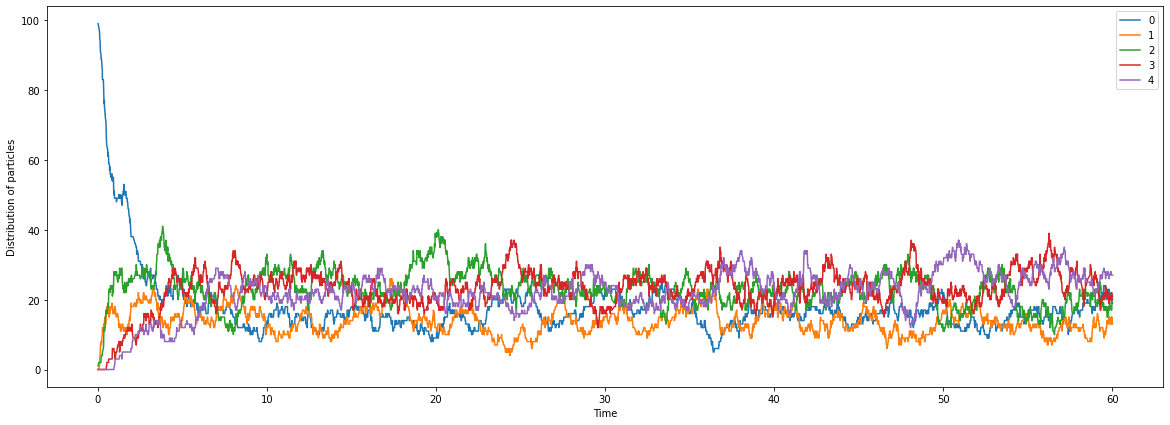

In [40]:
fig, ax = plt.subplots(figsize=(20,7)) 
for node in range(len(G)):
    plt.plot(times, np.array(states)[:,node], label=node)
ax.legend()
plt.xlabel('Time')
plt.ylabel('Distribution of particles')
plt.legend()
# plt.savefig("plot2b.eps",format='eps')